[ 0.+0.j  1.+0.j  2.+0.j  1.+0.j]
[  1.80901699e+00+0.j   6.90983006e-01+0.j  -1.05517795e-16+0.j
   1.80901699e+00+0.j   6.90983006e-01+0.j]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


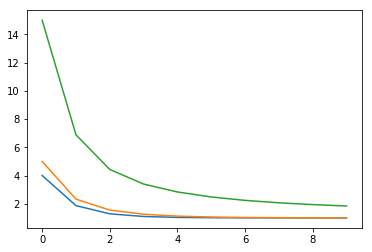

[(4+0j), (1.8710941655794973+0j), (1.2889862053619596+0j), (1.1020528889123942+0j), (1.0369667404053708+0j), (1.0135212939279332+0j), (1.0049636485656859+0j), (1.0018245954598282+0j), (1.0006710377909795+0j), (1.0002468348381532+0j)]


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
G3 = nx.Graph([(1,2),(2,3),(2,4),(4,5),(5,8),(8,7),(7,6),(6,3),(1,9),
              (9,10),(10,12),(12,14),(14,15),(15,13),(13,11),(11,9)])
l1 = eigvals(nx.normalized_laplacian_matrix(G1).todense())
l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())
print(l1)
print(l2)
time = np.arange(0,10)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
TT.append(T1)
TT.append(T2)
TT.append(T3)
plt.plot(time,T1)
plt.plot(time,T2)
plt.plot(time,T3)
plt.show()
print(T1)

In [15]:
I = np.identity(4)
l1 = nx.normalized_laplacian_matrix(G1).todense()
print(I-(l1))

[[-3.  2.  0.  2.]
 [ 2. -3.  2.  0.]
 [ 0.  2. -3.  2.]
 [ 2.  0.  2. -3.]]


In [34]:
from scipy.linalg import det

L1 = nx.laplacian_matrix(G1).todense()
#print(L1)
#print(-L1)
print(det(L1))

8.881784197001252e-16


In [29]:
from numpy import linalg as LA
w, v = LA.eigh(nx.normalized_laplacian_matrix(G1).todense())
print(w)
print(v)

[  5.55111512e-17   1.00000000e+00   1.00000000e+00   2.00000000e+00]
[[ 0.5        -0.30151134  0.63960215 -0.5       ]
 [ 0.5        -0.63960215 -0.30151134  0.5       ]
 [ 0.5         0.30151134 -0.63960215 -0.5       ]
 [ 0.5         0.63960215  0.30151134  0.5       ]]


In [30]:
v1 = v[:,1]
print(np.dot(v1, np.transpose(v1)))

[[ 0.09090909  0.1928473  -0.09090909 -0.1928473 ]
 [ 0.1928473   0.40909091 -0.1928473  -0.40909091]
 [-0.09090909 -0.1928473   0.09090909  0.1928473 ]
 [-0.1928473  -0.40909091  0.1928473   0.40909091]]


In [11]:
from scipy.linalg import expm
lk = nx.normalized_laplacian_matrix(G1).todense()
expm(-2*lk)

array([[ 0.32224655,  0.24542109,  0.18691127,  0.24542109],
       [ 0.24542109,  0.32224655,  0.24542109,  0.18691127],
       [ 0.18691127,  0.24542109,  0.32224655,  0.24542109],
       [ 0.24542109,  0.18691127,  0.24542109,  0.32224655]])

In [30]:
1+np.exp(-1)+np.exp(-1)+np.exp(-2)

1.8710941655794975

In [32]:
def nodes_connected(G,u, v):
    return u in G.neighbors(v)

def generalisedLapMatrix(G,x):
    nodelist = nx.nodes(G)
    nsize = len(nodelist)
    mp    = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        c = 0   
        i = nodelist.index(n)
        j = i+1
        for m in nodelist[j:]:
            if(nodes_connected(G,n,m)):
                mp[i,j]= mp[j,i] = -1
            else:
                s   = nx.shortest_path_length(G, source=n,target=m)
                val = (s*pow(x,(s-1)))
                mp[i,j]= mp[j,i]= -val
            j= j+1
        mp[i,i] =  -1*(mp[i].sum())
        i = 0
    return mp

In [34]:
generalisedLapMatrix(G1,0.5)

array([[ 3., -1., -1., -1.],
       [-1.,  3., -1., -1.],
       [-1., -1.,  3., -1.],
       [-1., -1., -1.,  3.]])

[  4.00000000e+00+0.j  -1.11022302e-16+0.j   4.00000000e+00+0.j
   4.00000000e+00+0.j]


/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


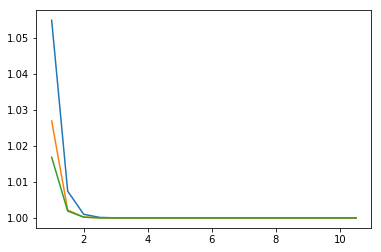

In [38]:
l1 = eigvals(generalisedLapMatrix(G1,0.5))
l2 = eigvals(generalisedLapMatrix(G2,0.5))
l3 = eigvals(generalisedLapMatrix(G3,0.5))
print(l1)
time = np.arange(1,11,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
TT.append(T1)
TT.append(T2)
TT.append(T3)
plt.plot(time,T1)
plt.plot(time,T2)
plt.plot(time,T3)
plt.show()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


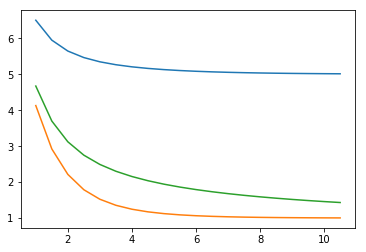

In [9]:
n = 10
Ge = nx.erdos_renyi_graph(n, 0.06, seed=None)
Gb = nx.barabasi_albert_graph(n, 3, seed=None)
Gw = nx.watts_strogatz_graph(10, 2, 0.1, seed=None)
l1 = eigvals(nx.normalized_laplacian_matrix(Ge).todense())
l2 = eigvals(nx.normalized_laplacian_matrix(Gb).todense())
l3 = eigvals(nx.normalized_laplacian_matrix(Gw).todense())

time = np.arange(1,11,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    
plt.plot(time,T1)
plt.plot(time,T2)
plt.plot(time,T3)
plt.show()

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,1)])
print(np.sum(np.exp(-1*nx.laplacian_spectrum(G1))))

1.28898620536


In [46]:
print(eigvals(nx.normalized_laplacian_matrix(G1).todense()))

[ 0.+0.j  1.+0.j  2.+0.j  1.+0.j]


In [12]:
L = nx.normalized_laplacian_matrix(G1).todense()


In [36]:
L1 = np.matrix([[1,0,-1,0],[0,1,0,-1],[-1,0,1,0],[0,-1,0,1]])
print(eigvals(L1))

[ 2.+0.j  0.+0.j  2.+0.j  0.+0.j]


In [3]:
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
L = nx.laplacian_matrix(G2).todense()
L1 = np.matrix([[2,0,-1,-1,0],[0,2,0,-1,-1],[-1,0,2,0,-1],[-1,-1,0,2,0],[0,-1,-1,0,2]])
L2 = L + 1/4 * L1
#print(np.sum(np.exp(-1*eigvals(L2))))
print(eigvals(L))
print(eigvals(L2))

[  3.61803399e+00+0.j   1.38196601e+00+0.j  -2.38411352e-16+0.j
   3.61803399e+00+0.j   1.38196601e+00+0.j]
[  4.44089210e-16+0.j   3.96352549e+00+0.j   2.28647451e+00+0.j
   2.28647451e+00+0.j   3.96352549e+00+0.j]


In [25]:
print(np.sum(np.exp(-1*nx.laplacian_spectrum(G2))))

1.55583963201


In [4]:
G3= nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)])
L = nx.laplacian_matrix(G3).todense()
L1 = np.matrix([[2,0,-1,0,-1,0],[0,2,0,-1,0,-1],[-1,0,2,0,-1,0],
                [0,-1,0,2,0,-1],[-1,0,-1,0,2,0],[0,-1,0,-1,0,2]])
L2 = np.matrix([[1,0,0,-1,0,0],[0,1,0,0,-1,0],[1,0,0,0,0,-1],
                [-1,0,0,1,0,0],[0,-1,0,0,1,0],[0,0,-1,0,0,1]])
L3 = L + 1/4 * L1 + 1/9*L2
#print(np.sum(np.exp(-1*eigvals(L3))))
print(eigvals(L))
print(eigvals(L + 1/4 * L1))
print(eigvals(L3))

[ -1.11022302e-16+0.j   1.00000000e+00+0.j   4.00000000e+00+0.j
   3.00000000e+00+0.j   3.00000000e+00+0.j   1.00000000e+00+0.j]
[  4.44089210e-16+0.j   1.75000000e+00+0.j   3.75000000e+00+0.j
   4.00000000e+00+0.j   1.75000000e+00+0.j   3.75000000e+00+0.j]
[  2.22044605e-16+0.j   1.91493225e+00+0.j   1.97222222e+00+0.j
   4.22222222e+00+0.j   3.69617886e+00+0.j   3.75000000e+00+0.j]


In [28]:
print(np.sum(np.exp(-1*nx.laplacian_spectrum(G3))))

1.85364865797


In [11]:
G4 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,1)])
L = nx.laplacian_matrix(G4).todense()
L1 = np.matrix([[2,0,-1,0,0,-1,0],[0,2,0,-1,0,0,-1],[-1,0,2,0,-1,0,0],
                [0,-1,0,2,0,-1,0],[0,0,-1,0,2,0,-1],[-1,0,0,-1,0,2,0],
               [0,-1,0,0,-1,0,2]])
L2 = np.matrix([[2,0,0,-1,-1,0,0],[0,2,0,0,-1,-1,0],[0,0,2,0,0,-1,-1],
                [-1,0,0,2,0,0,-1],[-1,-1,0,0,2,0,0],[0,-1,-1,0,0,2,0],
                [0,0,-1,-1,0,0,2]])
L3 = L + 1/4 * L1 + 1/9*L2
#print(np.sum(np.exp(-1*eigvals(L3))))
print(eigvals(L))
print(eigvals(L3))
#print(L+L1+L2)

[ -6.66133815e-16+0.j   2.44504187e+00+0.j   3.80193774e+00+0.j
   3.80193774e+00+0.j   7.53020396e-01+0.j   7.53020396e-01+0.j
   2.44504187e+00+0.j]
[  4.44089210e-16+0.j   1.78671839e+00+0.j   4.26186415e+00+0.j
   3.47919523e+00+0.j   1.78671839e+00+0.j   3.47919523e+00+0.j
   4.26186415e+00+0.j]


In [33]:
print(np.sum(np.exp(-1*nx.laplacian_spectrum(G4))))

2.15998388033


/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


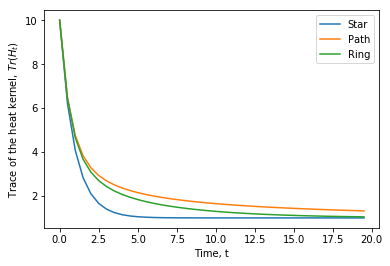

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(nx.normalized_laplacian_matrix(G1).todense())
l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())
#print(l1)
#print(l2)
time = np.arange(0,20,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='Star')
plt.plot(time,T2, label='Path')
plt.plot(time,T3, label='Ring')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


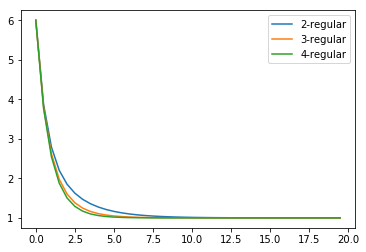

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,5),(2,4),(3,6)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,5),(2,4),(3,6),
             (2,6),(1,4),(3,5)])
#G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(nx.normalized_laplacian_matrix(G1).todense())
l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())
#print(l1)
#print(l2)
time = np.arange(0,20,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='2-regular')
plt.plot(time,T2, label='3-regular')
plt.plot(time,T3, label='4-regular')
plt.legend()
plt.show()

[  1.80901699e+00+0.j   6.90983006e-01+0.j  -1.05517795e-16+0.j
   1.80901699e+00+0.j   6.90983006e-01+0.j]
[  4.82263933e-18+0.j   1.80901699e+00+0.j   1.80901699e+00+0.j
   6.90983006e-01+0.j   6.90983006e-01+0.j]


/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


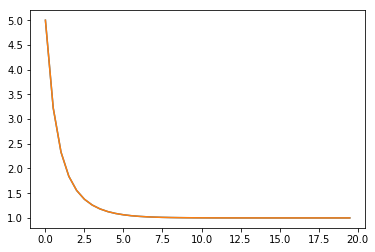

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
#G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,5),(2,4),(3,6)])
#G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,5),(2,4),(3,6),
             #(2,6),(1,4),(3,5)])
#G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(nx.normalized_laplacian_matrix(G1).todense())
l2 = eigvals(np.matrix([[1,0,-1/2,-1/2,0],[0,1,0,-1/2,-1/2],[-1/2,0,1,0,-1/2],
                [-1/2,-1/2,0,1,0],[0,-1/2,-1/2,0,1]]))
#l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
#l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())
print(l1)
print(l2)
time = np.arange(0,20,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    #T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1)
plt.plot(time,T2)
#plt.plot(time,T3)
plt.show()

In [8]:
l2 = eigvals(np.matrix([[1,0,-1/2,0,-1/2],[0,1,0,-1,0],[-1/2,0,2,0,-1/2],
                       [0,-1,0,1,0],[-1/2,0,-1/2,0,2]]))
l2

array([ 0.5+0.j,  2.0+0.j,  0.0+0.j,  2.0+0.j,  2.5+0.j])

[ 0.00000000+0.j  0.59175171+0.j  2.00000000+0.j  1.40824829+0.j
  1.00000000+0.j]
[ 0.5+0.j  2.0+0.j  0.0+0.j  2.0+0.j  2.5+0.j]


/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


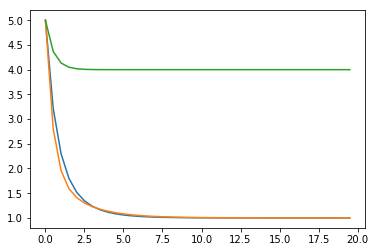

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2)])
#G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,5),(2,4),(3,6)])
#G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,5),(2,4),(3,6),
             #(2,6),(1,4),(3,5)])
#G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(nx.normalized_laplacian_matrix(G1).todense())
l2 = eigvals(np.matrix([[1,0,-1/2,0,-1/2],[0,1,0,-1,0],[-1/2,0,2,0,-1/2],
                       [0,-1,0,1,0],[-1/2,0,-1/2,0,2]]))
l3 = eigvals(np.matrix([[1,0,0,-1,0],[0,0,0,0,0],[0,0,0,0,0],[-1,0,0,1,0],
                      [0,0,0,0,0]]))
#l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
#l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())
print(l1)
print(l2)
time = np.arange(0,20,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1)
plt.plot(time,T2)
plt.plot(time,T3)
plt.show()

In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)])
l1 = nx.normalized_laplacian_matrix(G1).todense()
w,v = eig(l1)
print(w)
print(v)

[  5.55111512e-17+0.j   5.00000000e-01+0.j   2.00000000e+00+0.j
   1.50000000e+00+0.j   5.00000000e-01+0.j   1.50000000e+00+0.j]
[[ 0.40824829  0.57735027  0.40824829 -0.57735027  0.01665973 -0.02774568]
 [ 0.40824829  0.28867513 -0.40824829  0.28867513  0.50812166 -0.48554946]
 [ 0.40824829 -0.28867513  0.40824829  0.28867513  0.49146193  0.51329514]
 [ 0.40824829 -0.57735027 -0.40824829 -0.57735027 -0.01665973 -0.02774568]
 [ 0.40824829 -0.28867513  0.40824829  0.28867513 -0.50812166 -0.48554946]
 [ 0.40824829  0.28867513 -0.40824829  0.28867513 -0.49146193  0.51329514]]


In [30]:
#print(v[0,:])
l = [a*b for a,b in zip(v[0,:],v[1,:])]
m = [0,0.5,-1,-0.5,0.5,1.5]
print(l)
print([a*b for a,b in zip(m,l)])

[0.16666666666666663, 0.16666666666666671, -0.16666666666666677, -0.16666666666666674, 0.0084651679156257965, 0.013471901462663576]
[0.0, 0.083333333333333356, 0.16666666666666677, 0.08333333333333337, 0.0042325839578128983, 0.020207852193995363]


In [32]:
from scipy.linalg import expm
I = np.identity(3)
print(expm(-I))

[[ 0.36787944  0.          0.        ]
 [ 0.          0.36787944  0.        ]
 [ 0.          0.          0.36787944]]


In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
e = eigvals(nx.normalized_laplacian_matrix(G1).todense())
print(e)
e = np.delete(e,2)
print(np.sum(-1*np.log(e)))

(-0.446287102628+0j)


In [24]:
#remove 5,1 
G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5)])
e = eigvals(nx.normalized_laplacian_matrix(G1).todense())
print(e)
e = np.delete(e,0)
print(np.sum(-1*np.log(e)))

[ 0.00000000+0.j  0.29289322+0.j  1.00000000+0.j  2.00000000+0.j
  1.70710678+0.j]
(6.66133814775e-16+0j)


In [26]:
#remove 4,5
G1 = nx.Graph([(1,2),(2,3),(3,4),(5,1)])
e = eigvals(nx.normalized_laplacian_matrix(G1).todense())
print(e)
e = np.delete(e,0)
print(np.sum(-1*np.log(e)))

[  5.55111512e-17+0.j   2.92893219e-01+0.j   2.00000000e+00+0.j
   1.70710678e+00+0.j   1.00000000e+00+0.j]
(-9.99200722163e-16+0j)


In [28]:
#remove 3,4
G1 = nx.Graph([(1,2),(2,3),(4,5),(5,1)])
e = eigvals(nx.normalized_laplacian_matrix(G1).todense())
print(e)
e = np.delete(e,0)
print(np.sum(-1*np.log(e)))

[ 0.00000000+0.j  1.00000000+0.j  2.00000000+0.j  1.70710678+0.j
  0.29289322+0.j]
(-5.55111512313e-16+0j)


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

#G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

l1 = eigvals(nx.normalized_laplacian_matrix(G1).todense())
l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())

print(l1)
print(l2)
print(l3)

[  2.00000000e+00+0.j   1.11022302e-16+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j
   1.00000000e+00+0.j]
[  6.93889390e-17+0.j   6.03073792e-02+0.j   2.33955557e-01+0.j
   5.00000000e-01+0.j   8.26351822e-01+0.j   1.17364818e+00+0.j
   1.50000000e+00+0.j   2.00000000e+00+0.j   1.93969262e+00+0.j
   1.76604444e+00+0.j]
[ 0.00000000+0.j  0.19098301+0.j  0.69098301+0.j  1.30901699+0.j
  2.00000000+0.j  1.80901699+0.j  0.19098301+0.j  0.69098301+0.j
  1.80901699+0.j  1.30901699+0.j]


In [3]:
l1 = np.delete(l1,1)
print(np.sum(-1*np.log(l1)))
l2 = np.delete(l2,0)
print(np.sum(-1*np.log(l2)))
l3 = np.delete(l3,0)
print(np.sum(-1*np.log(l3)))

(-0.69314718056+0j)
(2.65480568658+0j)
(1.63315443905+0j)


In [4]:
G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,5),(2,4),(3,6)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,5),(2,4),(3,6),
             (2,6),(1,4),(3,5)])

l1 = eigvals(nx.normalized_laplacian_matrix(G1).todense())
l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())

print(l1)
print(l2)
print(l3)

[  5.55111512e-17+0.j   5.00000000e-01+0.j   2.00000000e+00+0.j
   1.50000000e+00+0.j   5.00000000e-01+0.j   1.50000000e+00+0.j]
[  1.66666667e+00+0.j  -2.08166817e-17+0.j   1.00000000e+00+0.j
   6.66666667e-01+0.j   1.66666667e+00+0.j   1.00000000e+00+0.j]
[  1.11022302e-16+0.j   1.00000000e+00+0.j   1.50000000e+00+0.j
   1.50000000e+00+0.j   1.00000000e+00+0.j   1.00000000e+00+0.j]


In [5]:
l1 = np.delete(l1,0)
print(np.sum(-1*np.log(l1)))
l2 = np.delete(l2,1)
print(np.sum(-1*np.log(l2)))
l3 = np.delete(l3,0)
print(np.sum(-1*np.log(l3)))

(-0.117783035656+0j)
(-0.616186139424+0j)
(-0.810930216216+0j)


In [11]:
import numpy as np
import networkx as nx
import numpy.linalg as lp
from numpy import linalg as LA
import itertools

def kplaplacian_mlf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -pow(k,-1*lam)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


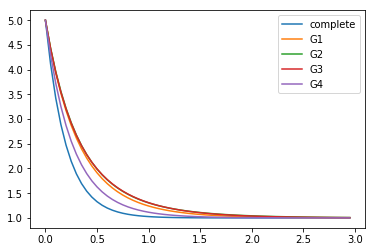

In [20]:
#kernels of complete graphs and generalised k-graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.complete_graph(5, create_using=None)
l  = nx.laplacian_spectrum(G)

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2)])
G3 = nx.Graph([(1,2),(2,3),(1,3),(3,4),(3,5)])
G4 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1),(1,4),(2,5)])

l1 = eigvals(kplaplacian_mlf(G1,2))
l2 = eigvals(kplaplacian_mlf(G2,2))
l3 = eigvals(kplaplacian_mlf(G3,2))
l4 = eigvals(kplaplacian_mlf(G4,2))

time = np.arange(0,3,0.05)

T=[]
T1=[]
T2=[]
T3 = []
T4 =[]
TT=[]
for t in time:
    T.append(np.sum(np.exp(-t*(l))))
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))

plt.plot(time,T,label='complete')
plt.plot(time,T1, label = 'G1')
plt.plot(time,T2, label='G2')
plt.plot(time, T3, label='G3')
plt.plot(time, T4, label='G4')
plt.legend()
plt.show()

In [22]:
kplaplacian_mlf(G2,2)

array([[ 1.61111111, -1.        , -0.25      , -0.11111111, -0.25      ],
       [-1.        ,  3.25      , -1.        , -0.25      , -1.        ],
       [-0.25      , -1.        ,  2.5       , -1.        , -0.25      ],
       [-0.11111111, -0.25      , -1.        ,  2.36111111, -1.        ],
       [-0.25      , -1.        , -0.25      , -1.        ,  2.5       ]])

In [35]:
eigvals(nx.laplacian_matrix(G2).todense())
#eigvals(kplaplacian_mlf(G2,2))

array([ -2.22044605e-16+0.j,   8.29913513e-01+0.j,   4.48119430e+00+0.j,
         2.68889218e+00+0.j,   2.00000000e+00+0.j])

In [36]:
eigvals(nx.laplacian_matrix(G3).todense())
#eigvals(kplaplacian_mlf(G3,2))

array([  5.00000000e+00+0.j,   3.00000000e+00+0.j,  -2.19591591e-16+0.j,
         1.00000000e+00+0.j,   1.00000000e+00+0.j])

In [32]:
eigvals(nx.laplacian_matrix(G4).todense())
eigvals(kplaplacian_mlf(G4,2))

array([ 0.00+0.j,  2.75+0.j,  4.25+0.j,  5.00+0.j,  3.50+0.j])

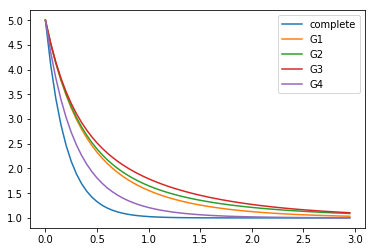

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.complete_graph(5, create_using=None)
l  = nx.laplacian_spectrum(G)

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2)])
G3 = nx.Graph([(1,2),(2,3),(1,3),(3,4),(3,5)])
G4 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1),(1,4),(2,5)])

l1 = nx.laplacian_spectrum(G1)
l2 = nx.laplacian_spectrum(G2)
l3 = nx.laplacian_spectrum(G3)
l4 = nx.laplacian_spectrum(G4)

time = np.arange(0,3,0.05)

T=[]
T1=[]
T2=[]
T3 = []
T4 =[]
TT=[]
for t in time:
    T.append(np.sum(np.exp(-t*(l))))
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))
    T4.append(np.sum(np.exp(-t*(l4))))

plt.plot(time,T,label='complete')
plt.plot(time,T1, label = 'G1')
plt.plot(time,T2, label='G2')
plt.plot(time, T3, label='G3')
plt.plot(time, T4, label='G4')
plt.legend()
plt.show()